In [ ]:
import pandas as pd

# Load the data, ensuring 'Date' is parsed as a datetime object
data = pd.read_csv('/content/normalized_data-1.csv', parse_dates=['Date'])

# Check the data types to confirm 'Date' is datetime type
print(data.dtypes)


# Inspect the first few rows of the dataframe
print(data.head())


Date                    datetime64[ns]
Valeur                         float64
Price                          float64
Open                           float64
High                           float64
Low                            float64
Change %                       float64
Volume                         float64
Adjusted_Close                 float64
ROI                            float64
yearly_std                     float64
7_day_avg_roi                  float64
30_day_avg_roi                 float64
7_day_std                      float64
30_day_std                     float64
Open Change                    float64
Volume Change                  float64
High Change %                  float64
Volume Change %                float64
Row_SD                         float64
Index                          float64
stock_return                   float64
Price_Lag_Forward_1            float64
Price_Lag_Backward_1           float64
Price_Lag_Forward_2            float64
Price_Lag_Backward_2     

In [ ]:
# Pivot without dropping data, check for duplicates
pivot_changes = data.pivot_table(index='Date', columns='Valeur', values='Change %', aggfunc='mean')  # 'mean' can be replaced with 'sum' or another appropriate function

# Check how many unique dates are present
print("Unique dates in dataset:", pivot_changes.index.nunique())




Unique dates in dataset: 986


In [ ]:
# Check for duplicates
if data.duplicated(subset=['Date', 'Valeur']).any():
    print("Duplicates found. Consider resolving duplicates or using an aggregate function.")




In [ ]:
# Create the pivot table again
pivot_changes = data.pivot_table(index='Date', columns='Valeur', values='Change %', aggfunc='mean')

# Display the head and the shape of the pivot table to verify its structure
print(pivot_changes.head())
print("Shape of pivot_changes:", pivot_changes.shape)


Valeur      0.000000  0.052632  0.105263  0.157895  0.210526  0.263158  \
Date                                                                     
2020-02-14       NaN       NaN       NaN       NaN       NaN       NaN   
2020-02-17       NaN       NaN       NaN       NaN       NaN       NaN   
2020-02-18       NaN       NaN       NaN       NaN       NaN       NaN   
2020-02-19       NaN       NaN       NaN       NaN       NaN       NaN   
2020-02-20       NaN       NaN       NaN       NaN       NaN       NaN   

Valeur      0.315789  0.368421  0.421053  0.473684  0.526316  0.578947  \
Date                                                                     
2020-02-14       NaN       NaN       NaN  0.458676       NaN       NaN   
2020-02-17       NaN       NaN       NaN  0.513604       NaN       NaN   
2020-02-18       NaN       NaN       NaN  0.473306       NaN       NaN   
2020-02-19       NaN       NaN       NaN  0.473049       NaN       NaN   
2020-02-20       NaN       NaN       

In [ ]:
# Fill missing values with forward fill, then backward fill
pivot_changes_filled = pivot_changes.fillna(method='ffill').fillna(method='bfill')

# Alternatively, drop columns with more than a certain threshold of missing values
threshold = 0.5 # Example: drop columns with more than 50% missing values
pivot_changes_dropped = pivot_changes.dropna(axis=1, thresh=int(pivot_changes.shape[0] * (1 - threshold)))
print(pivot_changes_filled)

Valeur      0.000000  0.052632  0.105263  0.157895  0.210526  0.263158  \
Date                                                                     
2020-02-14  0.503593  0.415811  0.459702  0.437115  0.390914  0.515400   
2020-02-17  0.503593  0.415811  0.459702  0.437115  0.390914  0.515400   
2020-02-18  0.503593  0.415811  0.459702  0.437115  0.390914  0.515400   
2020-02-19  0.503593  0.415811  0.459702  0.437115  0.390914  0.515400   
2020-02-20  0.503593  0.415811  0.459702  0.437115  0.390914  0.515400   
...              ...       ...       ...       ...       ...       ...   
2024-01-15  0.451745  0.421458  0.401181  0.373203  0.432495  0.448665   
2024-01-16  0.451745  0.421458  0.401181  0.373203  0.432495  0.448665   
2024-01-17  0.451745  0.421458  0.401181  0.373203  0.432495  0.448665   
2024-01-18  0.451745  0.421458  0.401181  0.373203  0.432495  0.448665   
2024-01-19  0.451745  0.421458  0.401181  0.373203  0.432495  0.448665   

Valeur      0.315789  0.368421  0.421

In [ ]:
# Using filled data
corr_matrix_filled = pivot_changes_filled.corr()

# Using data with sparse columns dropped
corr_matrix_dropped = pivot_changes_dropped.corr()

# Print the correlation matrix to check its completeness
print(corr_matrix_filled)


Valeur    0.000000  0.052632  0.105263  0.157895  0.210526  0.263158  \
Valeur                                                                 
0.000000  1.000000 -0.204681  0.089758 -0.003483 -0.290179  0.248438   
0.052632 -0.204681  1.000000  0.044282  0.147959  0.370896 -0.117060   
0.105263  0.089758  0.044282  1.000000  0.165078 -0.030680  0.079644   
0.157895 -0.003483  0.147959  0.165078  1.000000  0.098166  0.009431   
0.210526 -0.290179  0.370896 -0.030680  0.098166  1.000000 -0.263904   
0.263158  0.248438 -0.117060  0.079644  0.009431 -0.263904  1.000000   
0.315789 -0.041505  0.143151 -0.017603  0.024571  0.186557 -0.063544   
0.368421 -0.188301  0.220899  0.034004  0.053345  0.303145 -0.237755   
0.421053 -0.210632  0.077348 -0.201685 -0.138595  0.167892 -0.223151   
0.473684 -0.003176  0.055859 -0.023199  0.071999  0.014943 -0.044257   
0.526316 -0.062430  0.012946 -0.106264  0.012004  0.054954 -0.113298   
0.578947  0.040680  0.082342  0.016283  0.034793  0.009830  0.01

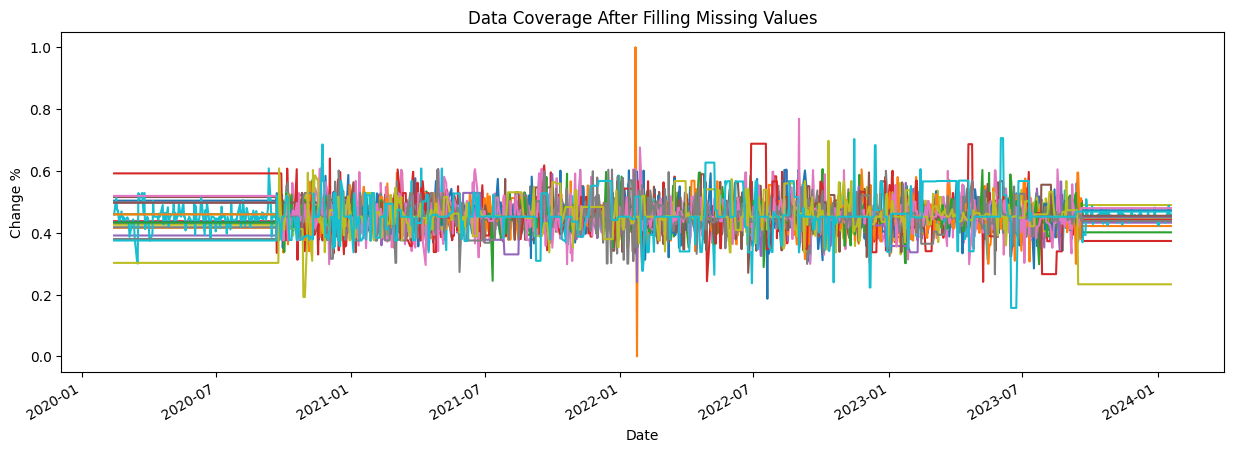

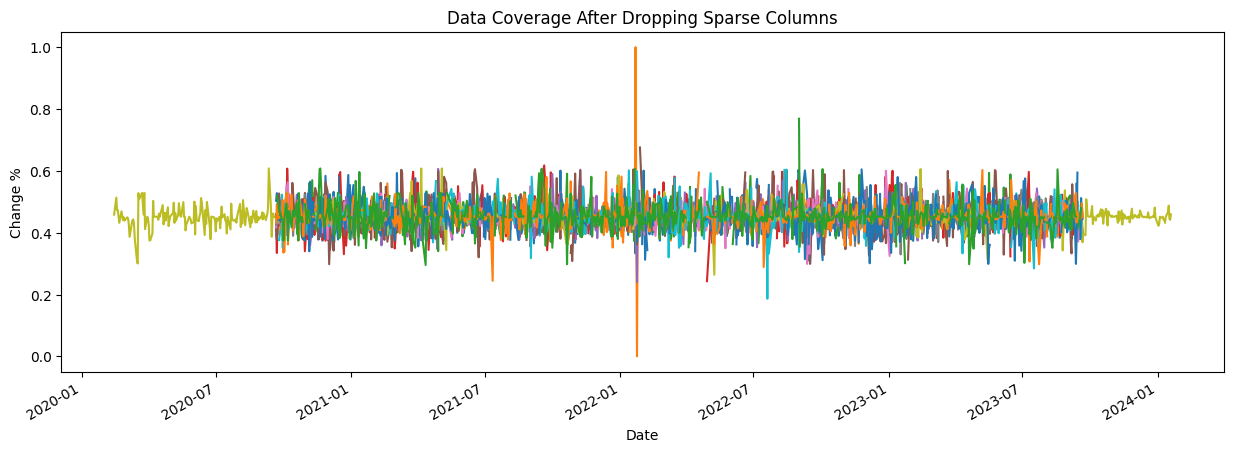

In [ ]:
import matplotlib.pyplot as plt

# Visualize the data coverage after filling
pivot_changes_filled.plot(legend=False, figsize=(15, 5), title='Data Coverage After Filling Missing Values')
plt.xlabel('Date')
plt.ylabel('Change %')
plt.show()

# Visualize the data coverage after dropping sparse columns
pivot_changes_dropped.plot(legend=False, figsize=(15, 5), title='Data Coverage After Dropping Sparse Columns')
plt.xlabel('Date')
plt.ylabel('Change %')
plt.show()


In [ ]:
corr_matrix = pivot_changes_filled.corr()


In [ ]:
distance_matrix = np.sqrt(0.5 * (1 - corr_matrix))


In [ ]:
print(corr_matrix_filled)

Valeur    0.000000  0.052632  0.105263  0.157895  0.210526  0.263158  \
Valeur                                                                 
0.000000  1.000000 -0.204681  0.089758 -0.003483 -0.290179  0.248438   
0.052632 -0.204681  1.000000  0.044282  0.147959  0.370896 -0.117060   
0.105263  0.089758  0.044282  1.000000  0.165078 -0.030680  0.079644   
0.157895 -0.003483  0.147959  0.165078  1.000000  0.098166  0.009431   
0.210526 -0.290179  0.370896 -0.030680  0.098166  1.000000 -0.263904   
0.263158  0.248438 -0.117060  0.079644  0.009431 -0.263904  1.000000   
0.315789 -0.041505  0.143151 -0.017603  0.024571  0.186557 -0.063544   
0.368421 -0.188301  0.220899  0.034004  0.053345  0.303145 -0.237755   
0.421053 -0.210632  0.077348 -0.201685 -0.138595  0.167892 -0.223151   
0.473684 -0.003176  0.055859 -0.023199  0.071999  0.014943 -0.044257   
0.526316 -0.062430  0.012946 -0.106264  0.012004  0.054954 -0.113298   
0.578947  0.040680  0.082342  0.016283  0.034793  0.009830  0.01

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
linkage_matrix = linkage(distance_matrix, 'ward')


<ipython-input-36-291111ff7657>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, 'ward')


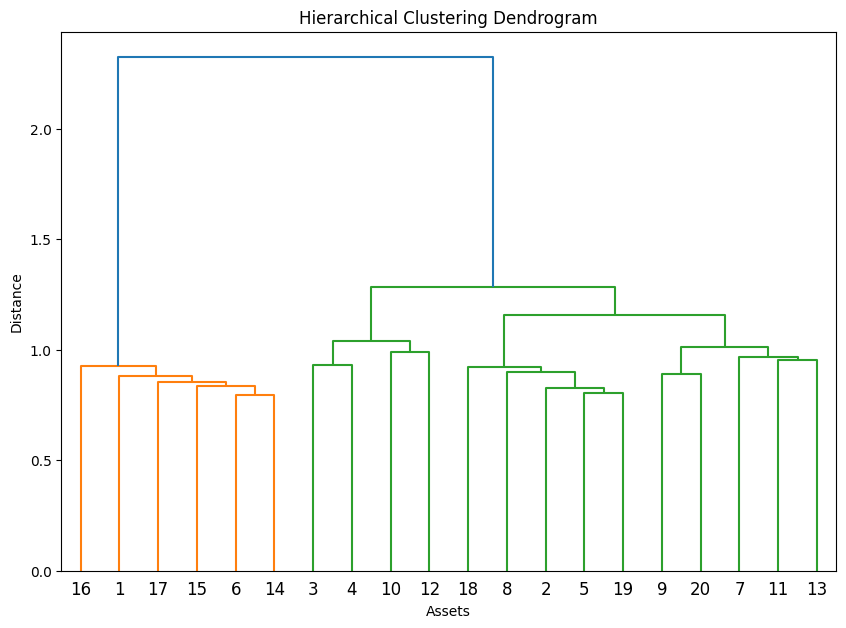

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=corr_matrix.index)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Assets')
plt.ylabel('Distance')
plt.show()


In [ ]:
# Define the mapping based on the sorted unique values in the original 'Valeur' columns
unique_valeurs = sorted(pivot_changes_filled.columns.unique())
mapping = {valeur: i+1 for i, valeur in enumerate(unique_valeurs)}

# Apply the mapping to the columns of the DataFrame
pivot_changes_filled.columns = [mapping[valeur] for valeur in pivot_changes_filled.columns]

# Now recalculate the correlation matrix with the updated 'Valeur' column names
corr_matrix = pivot_changes_filled.corr()

# Print the mapping for reference
print("Mapping of 'Valeur' to integers:", mapping)

# Look at the correlation matrix with the updated column names
print(corr_matrix)


Mapping of 'Valeur' to integers: {0.0: 1, 0.0526315789473684: 2, 0.1052631578947368: 3, 0.1578947368421052: 4, 0.2105263157894736: 5, 0.2631578947368421: 6, 0.3157894736842105: 7, 0.3684210526315789: 8, 0.4210526315789473: 9, 0.4736842105263157: 10, 0.5263157894736843: 11, 0.5789473684210527: 12, 0.631578947368421: 13, 0.6842105263157894: 14, 0.736842105263158: 15, 0.7894736842105263: 16, 0.8421052631578947: 17, 0.894736842105263: 18, 0.9473684210526316: 19, 1.0: 20}
          1         2         3         4         5         6         7   \
1   1.000000 -0.204681  0.089758 -0.003483 -0.290179  0.248438 -0.041505   
2  -0.204681  1.000000  0.044282  0.147959  0.370896 -0.117060  0.143151   
3   0.089758  0.044282  1.000000  0.165078 -0.030680  0.079644 -0.017603   
4  -0.003483  0.147959  0.165078  1.000000  0.098166  0.009431  0.024571   
5  -0.290179  0.370896 -0.030680  0.098166  1.000000 -0.263904  0.186557   
6   0.248438 -0.117060  0.079644  0.009431 -0.263904  1.000000 -0.063544

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Set a distance threshold for clustering
# This value may need to be adjusted depending on the specific dendrogram structure
distance_threshold = 1.5
clusters = fcluster(linkage_matrix, distance_threshold, criterion='distance')

# Print the clusters for each asset
print("Cluster assignments for each asset:")
for i, cluster in enumerate(clusters):
    print(f"Asset {i+1}: Cluster {cluster}")


Cluster assignments for each asset:
Asset 1: Cluster 1
Asset 2: Cluster 2
Asset 3: Cluster 2
Asset 4: Cluster 2
Asset 5: Cluster 2
Asset 6: Cluster 1
Asset 7: Cluster 2
Asset 8: Cluster 2
Asset 9: Cluster 2
Asset 10: Cluster 2
Asset 11: Cluster 2
Asset 12: Cluster 2
Asset 13: Cluster 2
Asset 14: Cluster 1
Asset 15: Cluster 1
Asset 16: Cluster 1
Asset 17: Cluster 1
Asset 18: Cluster 2
Asset 19: Cluster 2
Asset 20: Cluster 2


In [ ]:
# Compute the inverse variance weights within each cluster
def get_inverse_variance_weights(corr_matrix, clusters):
    asset_weights = pd.Series(index=corr_matrix.index, dtype=float)
    for cluster in set(clusters):
        assets_in_cluster = corr_matrix.columns[clusters == cluster]
        # Subset the correlation matrix and calculate the inverse-variance weights
        cluster_corr_matrix = corr_matrix.loc[assets_in_cluster, assets_in_cluster]
        inverse_variance = 1 / np.diag(cluster_corr_matrix.values)
        cluster_weights = inverse_variance / inverse_variance.sum()
        asset_weights[assets_in_cluster] = cluster_weights

    return asset_weights

inverse_variance_weights = get_inverse_variance_weights(corr_matrix, clusters)
print("Inverse variance weights for each asset:")
print(inverse_variance_weights)


Inverse variance weights for each asset:
1     0.166667
2     0.071429
3     0.071429
4     0.071429
5     0.071429
6     0.166667
7     0.071429
8     0.071429
9     0.071429
10    0.071429
11    0.071429
12    0.071429
13    0.071429
14    0.166667
15    0.166667
16    0.166667
17    0.166667
18    0.071429
19    0.071429
20    0.071429
dtype: float64


In [ ]:
# Get the order of the assets (leaves) after hierarchical clustering
leaves_order = sch.leaves_list(linkage_matrix)

# Print the leaves order to verify it's correct
print("Leaves order from dendrogram:", leaves_order)


Leaves order from dendrogram: [15  0 16 14  5 13  2  3  9 11 17  7  1  4 18  8 19  6 10 12]


In [ ]:
# Sort the correlation matrix according to the leaves order
sorted_corr_matrix = corr_matrix.iloc[leaves_order, leaves_order]

# Sort the inverse variance weights accordingly
sorted_inverse_variance_weights = inverse_variance_weights.iloc[leaves_order]
print(sorted_inverse_variance_weights)

16    0.083333
1     0.083333
17    0.083333
15    0.083333
6     0.083333
14    0.083333
3     0.035714
4     0.035714
10    0.035714
12    0.035714
18    0.035714
8     0.035714
2     0.035714
5     0.035714
19    0.035714
9     0.035714
20    0.035714
7     0.035714
11    0.035714
13    0.035714
dtype: float64


In [ ]:
# Initialize a dictionary for weights with keys as indices (0 to n_assets-1)
initial_weights_dict = {i: sorted_inverse_variance_weights.iloc[i] for i in range(n_assets)}

# Perform the recursive bisection using the corrected dictionary
hrp_weights = recursive_bisection(initial_weights_dict, 0, n_assets - 1)


<ipython-input-62-a2fc2c8f060e>:16: RuntimeWarning: invalid value encountered in scalar divide
  left_weights[k] *= left_variance / total_variance
<ipython-input-62-a2fc2c8f060e>:18: RuntimeWarning: invalid value encountered in scalar divide
  right_weights[k] *= right_variance / total_variance


In [ ]:
print(initial_weights_dict)

{0: 0.08333333333333333, 1: 0.08333333333333333, 2: 0.08333333333333333, 3: 0.08333333333333333, 4: 0.08333333333333333, 5: 0.08333333333333333, 6: 0.03571428571428571, 7: 0.03571428571428571, 8: 0.03571428571428571, 9: 0.03571428571428571, 10: 0.03571428571428571, 11: 0.03571428571428571, 12: 0.03571428571428571, 13: 0.03571428571428571, 14: 0.03571428571428571, 15: 0.03571428571428571, 16: 0.03571428571428571, 17: 0.03571428571428571, 18: 0.03571428571428571, 19: 0.03571428571428571}


In [ ]:
def recursive_bisection(weights, start, end):
    if start == end:
        # Base case: only one element
        return {start: weights[start]}
    else:
        mid = start + (end - start) // 2
        left_weights = recursive_bisection(weights, start, mid)
        right_weights = recursive_bisection(weights, mid + 1, end)

        # Sum up weights for left and right halves
        left_sum = sum(left_weights.values())
        right_sum = sum(right_weights.values())

        if left_sum == 0 or right_sum == 0:
            print(f"Warning: Zero sum encountered from {start} to {mid} or {mid+1} to {end}")

        # Avoid division by zero
        total_sum = left_sum + right_sum
        if total_sum == 0:
            print("Error: Total sum of weights is zero. Check input weights and divisions.")
            return {i: weights[i] for i in range(start, end + 1)}

        # Normalize weights based on total sum
        normalized_left_weights = {k: v * (left_sum / total_sum) for k, v in left_weights.items()}
        normalized_right_weights = {k: v * (right_sum / total_sum) for k, v in right_weights.items()}

        # Combine the weights from left and right
        normalized_left_weights.update(normalized_right_weights)
        return normalized_left_weights

# Execute the function
initial_weights_dict = {i: sorted_inverse_variance_weights.iloc[i] for i in range(n_assets)}
hrp_weights = recursive_bisection(initial_weights_dict, 0, n_assets - 1)

# Normalize the final weights to sum to 1
final_weights = pd.Series(hrp_weights)
final_weights /= final_weights.sum()

print("Final HRP Weights:")
print(final_weights)


Final HRP Weights:
0     0.073773
1     0.073773
2     0.147547
3     0.147547
4     0.147547
5     0.099455
6     0.018267
7     0.031495
8     0.028600
9     0.028600
10    0.012712
11    0.012712
12    0.025424
13    0.025424
14    0.025424
15    0.012712
16    0.012712
17    0.025424
18    0.025424
19    0.025424
dtype: float64


In [ ]:
def allocate_weights_recursively(linkage_matrix, sorted_assets, asset_weights):
    weights = pd.Series(1, index=sorted_assets)
    clustered_alphas = [linkage_matrix[-1][0], linkage_matrix[-1][1]]
    while clustered_alphas:
        cluster = clustered_alphas.pop(0)
        if cluster >= len(linkage_matrix) + 1:
            left = int(linkage_matrix[cluster - len(linkage_matrix) - 1][0])
            right = int(linkage_matrix[cluster - len(linkage_matrix) - 1][1])
            clustered_alphas += [left, right]
            left_var = get_cluster_var(cov_matrix, weights[cluster_indices[left]])
            right_var = get_cluster_var(cov_matrix, weights[cluster_indices[right]])
            alpha = 1 - left_var / (left_var + right_var)
            weights[cluster_indices[left]] *= alpha
            weights[cluster_indices[right]] *= 1 - alpha
    return weights

def get_cluster_var(cov_matrix, asset_indices):
    # Calculate the variance of a cluster
    cov_subset = cov_matrix.loc[asset_indices, asset_indices]
    inv_diag = 1 / np.diag(cov_subset)
    inv_diag = pd.Series(inv_diag, index=cov_subset.index)
    cluster_var = inv_diag @ np.linalg.inv(cov_subset) @ inv_diag
    return cluster_var

def get_cluster_indices(linkage_matrix):
    # Obtain the indices of assets in each cluster
    n = linkage_matrix.shape[0] + 1
    cluster_indices = {i: [i] for i in range(n)}
    for i, (a, b, _, _) in enumerate(linkage_matrix, n):
        cluster_indices[i] = cluster_indices[a] + cluster_indices[b]
    return cluster_indices




In [ ]:
# Assume you have $100,000 to invest
total_investment = 100000

# Create a DataFrame to hold your portfolio details
portfolio = pd.DataFrame({
    'HRP_Weights': final_weights,
    'Investment': final_weights * total_investment
})

print(portfolio)


    HRP_Weights    Investment
0      0.073773   7377.340402
1      0.073773   7377.340402
2      0.147547  14754.680803
3      0.147547  14754.680803
4      0.147547  14754.680803
5      0.099455   9945.542055
6      0.018267   1826.732214
7      0.031495   3149.538300
8      0.028600   2859.993503
9      0.028600   2859.993503
10     0.012712   1271.217326
11     0.012712   1271.217326
12     0.025424   2542.434651
13     0.025424   2542.434651
14     0.025424   2542.434651
15     0.012712   1271.217326
16     0.012712   1271.217326
17     0.025424   2542.434651
18     0.025424   2542.434651
19     0.025424   2542.434651


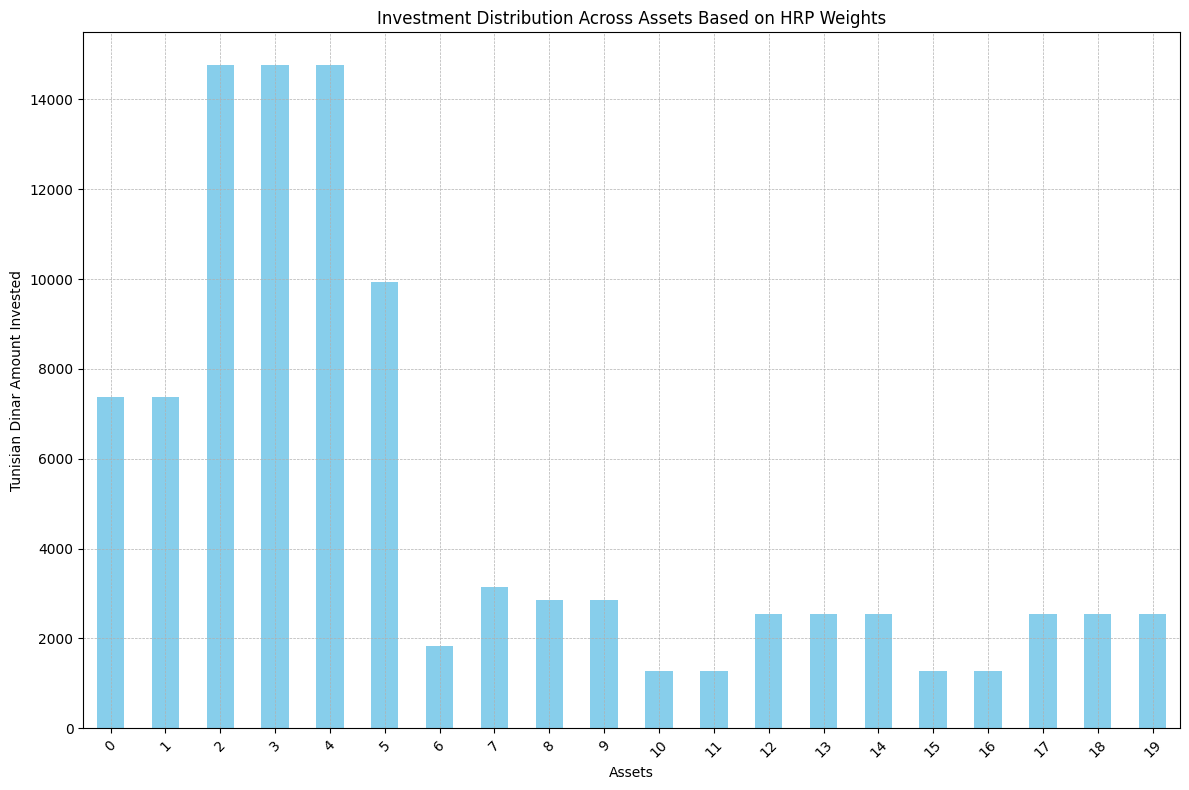

In [ ]:
import matplotlib.pyplot as plt

# Plotting the investment distribution
plt.figure(figsize=(12, 8))  # Set the figure size for better visibility
portfolio['Investment'].plot(kind='bar', color='skyblue')  # Create a bar chart
plt.title('Investment Distribution Across Assets Based on HRP Weights')  # Title of the plot
plt.xlabel('Assets')  # Label for the X-axis
plt.ylabel('Tunisian Dinar Amount Invested')  # Label for the Y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add a grid for easier reference
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


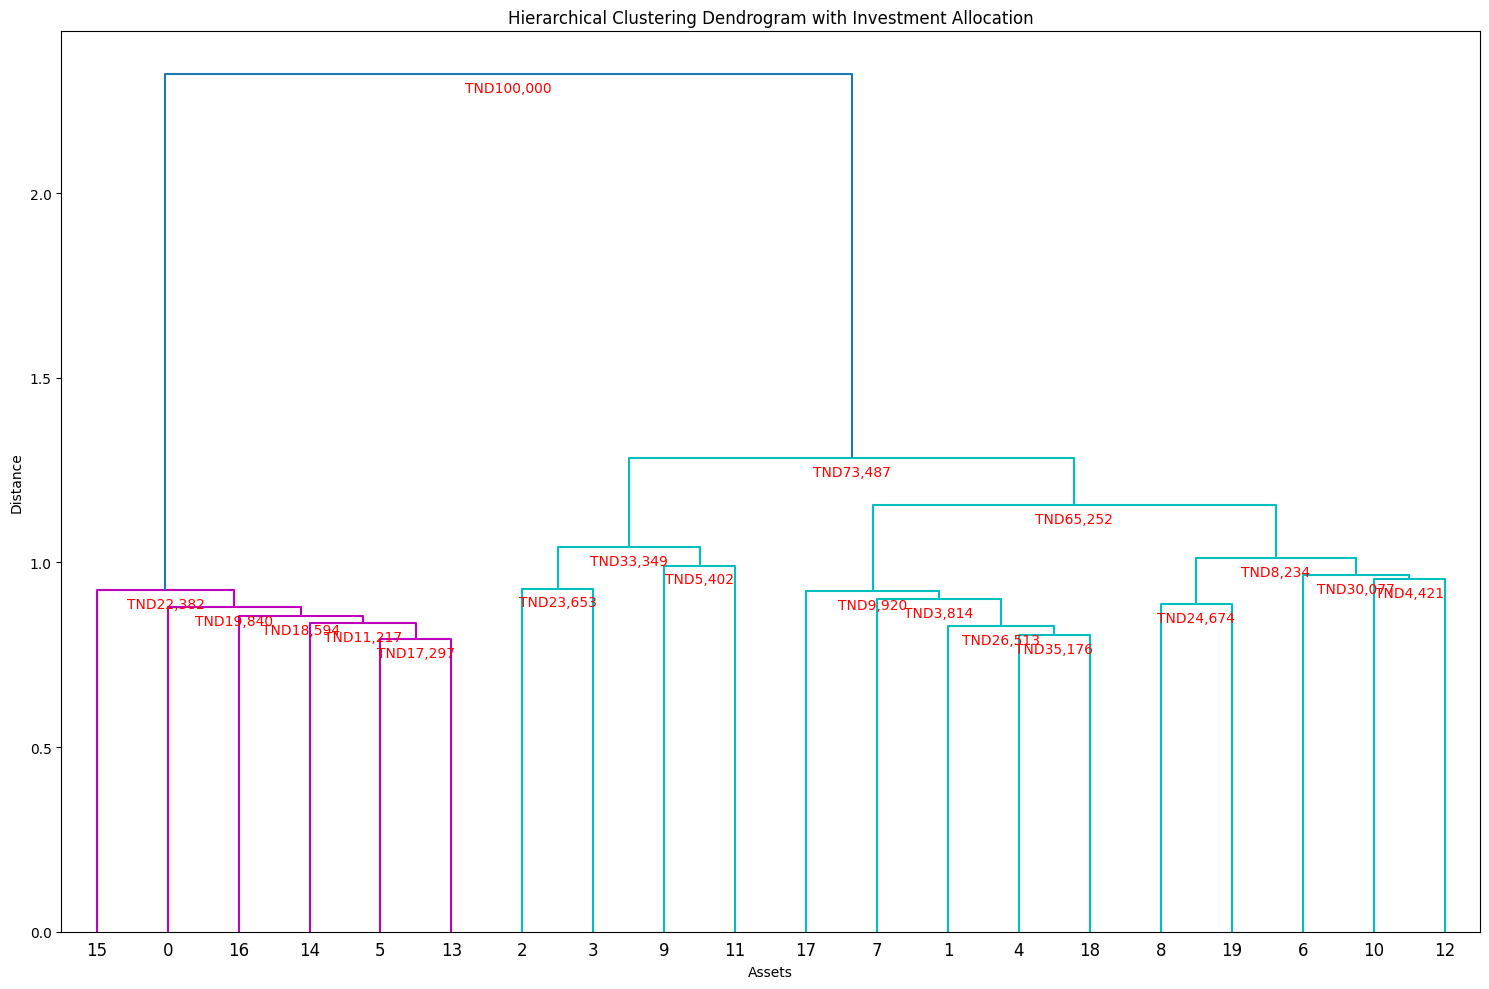

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Assume the 'linkage_matrix' variable is your hierarchical clustering result.
# Assume 'final_weights' is the pandas Series you provided with HRP weights, indexed by asset name or number.

# Calculate the investment amounts at each node of the dendrogram.
investment_allocation = final_weights * total_investment

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(15, 10))
dendro = dendrogram(linkage_matrix, labels=investment_allocation.index.tolist(), ax=ax)

# Initialize a dictionary to store the allocation of investments at each node.
investment_at_node = {i: 0 for i in range(len(linkage_matrix) + 1)}

# Start by assigning the investment amount to the leaf nodes.
for i, label in enumerate(dendro['ivl']):
    investment_at_node[i] = investment_allocation[label]

# Annotate the dendrogram with investment values
for i, (x, y) in enumerate(zip(dendro['icoord'], dendro['dcoord'])):
    # The x coordinate is the average of the xs in the pair that forms the link.
    x_coord = sum(x) / len(x)
    y_coord = max(y)

    # For each non-leaf node, compute the investment as the sum of its children's investments.
    node_index = int((len(linkage_matrix) + 1) + i)
    left_child, right_child = int(linkage_matrix[i, 0]), int(linkage_matrix[i, 1])
    investment_at_node[node_index] = investment_at_node[left_child] + investment_at_node[right_child]

    # Annotate the sum of the children's investments at the node.
    ax.annotate(f"TND{investment_at_node[node_index]:,.0f}", (x_coord, y_coord),
                xytext=(0, -5), textcoords='offset points',
                va='top', ha='center', color='red')

# Set labels and title
ax.set_xlabel('Assets')
ax.set_ylabel('Distance')
ax.set_title('Hierarchical Clustering Dendrogram with Investment Allocation')

# Show the plot
plt.tight_layout()
plt.show()


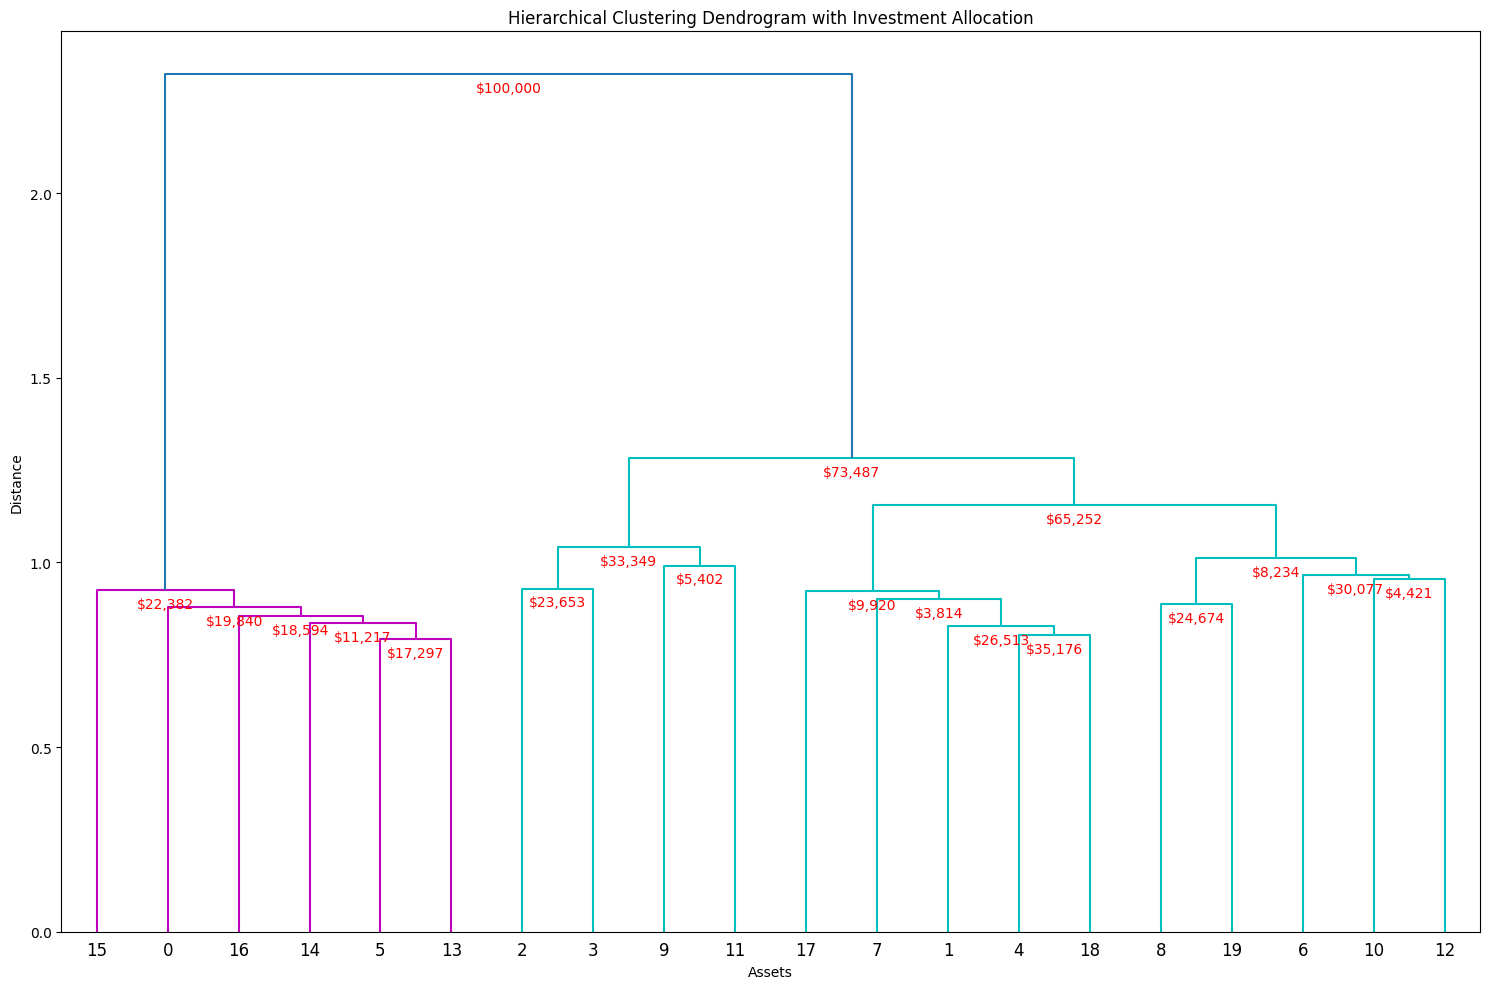

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Assume the 'linkage_matrix' variable is your hierarchical clustering result.
# Assume 'final_weights' is the pandas Series you provided with HRP weights, indexed by asset name or number.
# Assume 'total_investment' is set to 100,000 as mentioned before.

# Calculate the investment amounts at each node of the dendrogram.
investment_allocation = final_weights * total_investment

# Create a mapping of label to index based on dendrogram's leaf ordering
label2idx = {label: idx for idx, label in enumerate(dendro['leaves'])}

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(15, 10))
dendro = dendrogram(linkage_matrix, labels=investment_allocation.index.tolist(), ax=ax)

# Initialize a dictionary to store the allocation of investments at each node.
investment_at_node = {label2idx[label]: inv for label, inv in investment_allocation.items()}

# Record the allocation for internal nodes (non-leaf nodes).
for i, merge in enumerate(linkage_matrix):
    # The total investment for a non-leaf node is the sum of its children's investments
    left_inv = investment_at_node[merge[0]]
    right_inv = investment_at_node[merge[1]]
    investment_at_node[len(final_weights) + i] = left_inv + right_inv

# Annotate the dendrogram with investment values
for i, merge in enumerate(linkage_matrix):
    # Coordinates for annotation
    x_coord = (dendro['icoord'][i][1] + dendro['icoord'][i][2]) / 2
    y_coord = dendro['dcoord'][i][1]

    # Annotation text
    inv_text = f"${investment_at_node[len(final_weights) + i]:,.0f}"

    # Annotate
    ax.annotate(inv_text, (x_coord, y_coord), xytext=(0, -5),
                textcoords='offset points', va='top', ha='center', color='red')



# Set labels and title
ax.set_xlabel('Assets')
ax.set_ylabel('Distance')
ax.set_title('Hierarchical Clustering Dendrogram with Investment Allocation')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Sample asset names, replace these with your actual asset names or 'Valeur'
assets = ['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5',
          'Asset6', 'Asset7', 'Asset8', 'Asset9', 'Asset10',
          'Asset11', 'Asset12', 'Asset13', 'Asset14', 'Asset15',
          'Asset16', 'Asset17', 'Asset18', 'Asset19', 'Asset20']

# Sample HRP weights corresponding to the assets
hrp_weights = [0.073773, 0.073773, 0.147547, 0.147547, 0.147547,
               0.099455, 0.018267, 0.031495, 0.028600, 0.028600,
               0.012712, 0.012712, 0.025424, 0.025424, 0.025424,
               0.012712, 0.012712, 0.025424, 0.025424, 0.025424]

# Total investment amount
total_investment = 100000

# Create the DataFrame
portfolio = pd.DataFrame({
    'Assets': assets,
    'HRP_Weights': hrp_weights,
    'Investment': [weight * total_investment for weight in hrp_weights]
})

print(portfolio)


     Assets  HRP_Weights  Investment
0    Asset1     0.073773      7377.3
1    Asset2     0.073773      7377.3
2    Asset3     0.147547     14754.7
3    Asset4     0.147547     14754.7
4    Asset5     0.147547     14754.7
5    Asset6     0.099455      9945.5
6    Asset7     0.018267      1826.7
7    Asset8     0.031495      3149.5
8    Asset9     0.028600      2860.0
9   Asset10     0.028600      2860.0
10  Asset11     0.012712      1271.2
11  Asset12     0.012712      1271.2
12  Asset13     0.025424      2542.4
13  Asset14     0.025424      2542.4
14  Asset15     0.025424      2542.4
15  Asset16     0.012712      1271.2
16  Asset17     0.012712      1271.2
17  Asset18     0.025424      2542.4
18  Asset19     0.025424      2542.4
19  Asset20     0.025424      2542.4


In [ ]:
import numpy as np

# Generate random price changes for each asset
np.random.seed(42)  # For reproducibility
price_changes = np.random.normal(loc=0.02, scale=0.05, size=len(assets))  # Assume 2% average monthly return

# Calculate new values for each asset after price changes
portfolio['New_Value'] = portfolio['Investment'] * (1 + price_changes)

print(portfolio[['Assets', 'New_Value']])


     Assets     New_Value
0    Asset1   7708.066466
1    Asset2   7473.845139
2    Asset3  15527.616504
3    Asset4  16173.386431
4    Asset5  14877.050860
5    Asset6  10027.979545
6    Asset7   2007.471403
7    Asset8   3333.341784
8    Asset9   2850.065163
9   Asset10   2994.786086
10  Asset11   1267.169171
11  Asset12   1267.022217
12  Asset13   2624.006244
13  Asset14   2350.031815
14  Asset15   2373.976445
15  Asset16   1260.885005
16  Asset17   1232.248454
17  Asset18   2633.195121
18  Asset19   2477.819980
19  Asset20   2413.715953


In [ ]:
# Calculate the total new value of the portfolio
new_total_value = portfolio['New_Value'].sum()

# Determine the new dollar amount for each asset to restore original weights
portfolio['Rebalanced_Investment'] = portfolio['HRP_Weights'] * new_total_value

print(portfolio[['Assets', 'Rebalanced_Investment']])


     Assets  Rebalanced_Investment
0    Asset1            7589.299979
1    Asset2            7589.299979
2    Asset3           15178.702831
3    Asset4           15178.702831
4    Asset5           15178.702831
5    Asset6           10231.301823
6    Asset7            1879.193509
7    Asset8            3240.006545
8    Asset9            2942.187242
9   Asset10            2942.187242
10  Asset11            1307.730217
11  Asset12            1307.730217
12  Asset13            2615.460435
13  Asset14            2615.460435
14  Asset15            2615.460435
15  Asset16            1307.730217
16  Asset17            1307.730217
17  Asset18            2615.460435
18  Asset19            2615.460435
19  Asset20            2615.460435


In [ ]:
# Calculate the difference between current value and target rebalanced investment
portfolio['Transactions'] = portfolio['Rebalanced_Investment'] - portfolio['New_Value']

print(portfolio[['Assets', 'Transactions']])


     Assets  Transactions
0    Asset1   -118.766487
1    Asset2    115.454840
2    Asset3   -348.913672
3    Asset4   -994.683600
4    Asset5    301.651971
5    Asset6    203.322278
6    Asset7   -128.277894
7    Asset8    -93.335239
8    Asset9     92.122079
9   Asset10    -52.598844
10  Asset11     40.561046
11  Asset12     40.708001
12  Asset13     -8.545809
13  Asset14    265.428620
14  Asset15    241.483990
15  Asset16     46.845213
16  Asset17     75.481763
17  Asset18    -17.734686
18  Asset19    137.640455
19  Asset20    201.744481


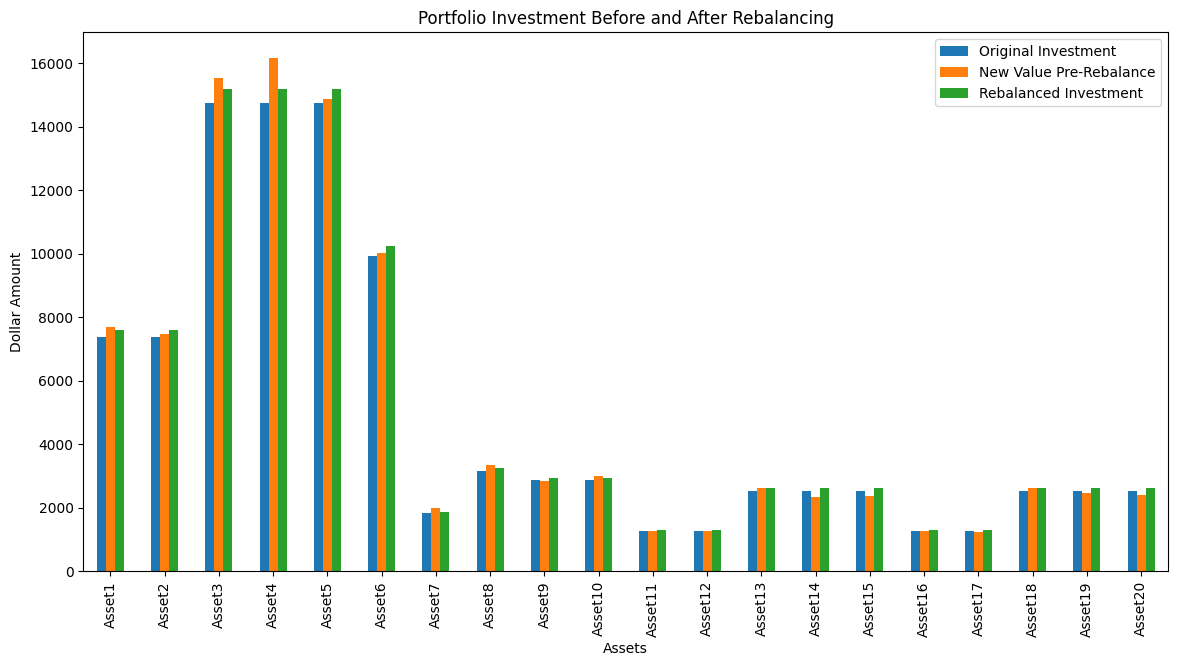

In [ ]:
import matplotlib.pyplot as plt

# Plot a bar chart
portfolio.set_index('Assets')[['Investment', 'New_Value', 'Rebalanced_Investment']].plot(kind='bar', figsize=(14, 7))
plt.title('Portfolio Investment Before and After Rebalancing')
plt.ylabel('Dollar Amount')
plt.xlabel('Assets')
plt.legend(['Original Investment', 'New Value Pre-Rebalance', 'Rebalanced Investment'])
plt.show()
